# Euler - Maruyama for SDE

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

In [16]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [17]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

In [18]:
x = np.zeros(n)

In [19]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + sigma_bis * sqrtdt * np.random.randn()

In [20]:
So = 100
r  = 0.02
sigma = 0.25
mu = np.log(So)+ (r-sigma**2/2)

In [21]:
np.mean(x)

10.054641486307949

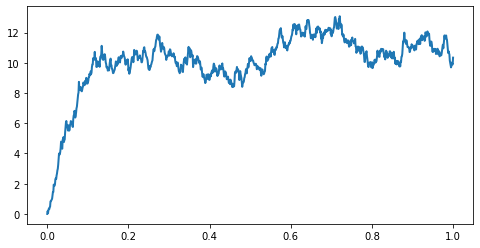

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

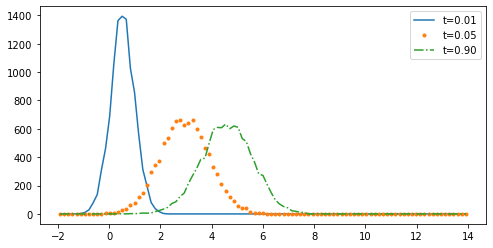

In [23]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) +  sigma_bis  * np.random.normal(0,sqrtdt,ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
ax.legend()
plt.show()

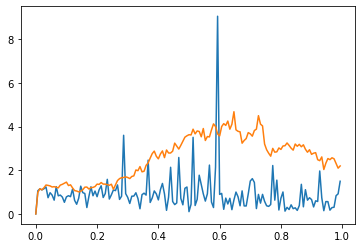

In [38]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt


# Number of simulations
num_sims = 1

# Number of points in partition
N = 150

# Initial value
X_0 = 1 
Y_0 = X_0

# Starting time
t_0 = 0

# Ending time
T = 1

# SDE for GBM: dX_t = r_0*X_t dt + sigma_0*X_t dB_t
r_0 = 0
sigma_0 = 1
	
# Time increments
dt = float(T - t_0) / N

# Times 
t = np.arange(t_0, T, dt) 

# Brownian increments
dB = np.zeros(N)
dB[0] = 0

# Brownian samples
B = np.zeros(N)
B[0] = 0

# Simulated process
X    = np.zeros(N) 
X[0] = 1

# Approximated process
Y    = np.zeros(N)
Y[0] = Y_0

# Sample means across all simulations
SX = np.zeros(N)
SY = np.zeros(N)

# Iterate
for n in range(num_sims):
    for i in range(1, t.size):
        # Generate dB_t
        dB[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        
        # Generate B_t
        B[i] = np.random.normal(loc = 0.0, scale = np.sqrt(t[i]) )
        
        # Simulate (blue)
        X[i] = X_0 * np.exp( (r_0 - 0.5 * sigma_0*sigma_0)*(i * dt) + (float(sigma_0) * B[i] ))
        SX[i] = SX[i] + X[i]/num_sims
        
        # Approximate (green)
        Y[i] = Y[i-1] + (r_0 * Y[i-1]) * dt + (sigma_0 * Y[i-1]) * dB[i]
        SY[i] = SY[i] + Y[i]/num_sims
    
# Plot
plt.plot(t, SX)
plt.plot(t, SY)    
plt.show()

In [39]:
np.mean(SX)

0.9152106766368759

In [40]:
np.mean(SY)

2.540570203512313

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import norm



kappa = 1              #mean-reversion speed
theta = 0.09           #long-term average volatility
eta   = 1              #volatility of vol process
rho   = -0.3           #correlation between stock and vol
v0    = 0.09           #initial volatility
r     = 0              #risk-free interest rate
tau   = 1              #time to maturity
S0    = 100            #initial share price
K     = [80,100,120]   #strike price



def HestonCallMonteCarlo(kappa, theta, eta, rho, v0, r, tau, S0, K, nSteps=1000, nPaths=3000):
    
    n = nSteps
    N = nPaths
    
    dt = tau / n
    alpha = norm.ppf(1-.05/2)
    negCount = 0
    
    S = np.repeat(S0,N)
    v = np.repeat(v0,N)
    
    for i in range(1,n):
        W1 = np.random.normal(0,1,N)
        W2 = np.random.normal(0,1,N)
        W2 = rho*W1 + np.sqrt(1 - rho**2)*W2
      
        sqvdt = np.sqrt(v*dt)
        S = S*np.exp((r-v/2)*dt + np.sqrt(v * dt) * W1)
    
        v = v + kappa*(theta - v)* dt + eta * sqvdt * W2
        negCount = negCount + len(v[v < 0])
        v[v < 0] = 0
     
      
    
    negCount = negCount / (n*N)
    
    ## Evaluate the European call value 
    V  =  np.exp(-r*tau)*np.maximum(S-K,0)  
    AV =  np.mean(V) # mean of call price
    AVdev = alpha * np.std(V) / np.sqrt(N) # standard error 
    rmse  = np.sqrt(np.var(V)/N)
    return(AV,AV-AVdev,AV+AVdev,rmse)


h1 = HestonCallMonteCarlo(kappa, theta, eta, rho, v0, r, tau, S0, K=K[0], nSteps=1000, nPaths=5000)
h2 = HestonCallMonteCarlo(kappa, theta, eta, rho, v0, r, tau, S0, K=K[1], nSteps=1000, nPaths=5000)
h3 = HestonCallMonteCarlo(kappa, theta, eta, rho, v0, r, tau, S0, K=K[2], nSteps=1000, nPaths=5000)
df = pd.DataFrame({'Heston K = 80' :h1,
                   'Heston K = 100':h2,
                   'Heston K = 120':h3 })
df.index = ['value', 'Lower 95%', 'Upper 95%', 'RMSE']
df

,Heston K = 80,Heston K = 100,Heston K = 120
value,23.431845,10.250457,3.559888
Lower 95%,22.782161,9.713627,3.150367
Upper 95%,24.081529,10.787288,3.969409
RMSE,0.331478,0.273898,0.208943
